# Week 10 – Batch Model Performance

# Week 10 – Batch Model Performance

This notebook analyzes model performance across five key stages in a batch learning workflow:

1. Dummy (Baseline)  
2. KNN Training  
3. KNN Prediction  
4. KNN Retraining  
5. KNN Retrained Prediction  

Due to the absence of true labels in the provided datasets, simulated ground truth values (`y_true`) were generated to enable metric evaluation.

To reflect a more realistic model update, the KNN Retraining phase introduces a 10% change in predictions compared to initial training. This simulates how retraining can affect model behavior and performance.

Performance is measured using Accuracy, Recall, and Precision, and visualized across the five steps using line segments with distinct slopes.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score


In [29]:
df_dummy = pd.read_csv("first.csv")
df_knn_train = pd.read_csv("second.csv")
df_knn_predict = pd.read_csv("third.csv")
df_knn_retrained = pd.read_csv("fourth.csv")

In [30]:
df_dummy.head()

,Unnamed: 0,key,x,y,result
0,0,1,-0.515258,0.601255,False
1,1,1,0.442515,0.883295,True
2,2,1,-0.412906,0.154696,False
3,3,1,0.485963,-0.782856,False
4,4,1,0.223733,0.254806,True


In [31]:
df_knn_train.head()

,Unnamed: 0,key,x,y,result
0,0,1,-0.629670,-0.201984,True
1,1,1,-0.054524,0.148606,False
2,2,1,-0.101044,-0.215570,True
3,3,1,0.264544,-0.579622,False
4,4,1,0.944177,0.389696,True


In [32]:
df_knn_predict = pd.read_csv("third.csv")
df_knn_predict.head()


,Unnamed: 0,key,x,y,result
0,0,1,0.131849,-0.859172,False
1,1,1,-0.334795,0.811895,False
2,2,1,0.782900,0.406387,False
3,3,1,-0.494875,-0.377257,False
4,4,1,-0.627271,-0.506035,True


In [33]:
df_knn_retrained = pd.read_csv("fourth.csv")
df_knn_retrained.head()


,Unnamed: 0,key,x,y,result
0,0,1,-0.167995,-0.715184,False
1,1,1,0.650967,0.807528,True
2,2,1,0.046858,-0.264659,False
3,3,1,0.882458,-0.205609,False
4,4,1,-0.338443,-0.885061,True


In [34]:
df_dummy['y_true'] = np.random.choice([True, False], size=len(df_dummy))
df_knn_train['y_true'] = np.random.choice([True, False], size=len(df_knn_train))
df_knn_predict['y_true'] = np.random.choice([True, False], size=len(df_knn_predict))
df_knn_retrained['y_true'] = np.random.choice([True, False], size=len(df_knn_retrained))


In [35]:
df_dummy.rename(columns={'result': 'y_pred'}, inplace=True)
df_knn_train.rename(columns={'result': 'y_pred'}, inplace=True)
df_knn_predict.rename(columns={'result': 'y_pred'}, inplace=True)
df_knn_retrained.rename(columns={'result': 'y_pred'}, inplace=True)


In [36]:
def compute_metrics(df):
    accuracy = accuracy_score(df['y_true'], df['y_pred'])
    recall = recall_score(df['y_true'], df['y_pred'], average='macro')
    precision = precision_score(df['y_true'], df['y_pred'], average='macro')
    return accuracy, recall, precision

In [37]:
metrics = {}

metrics["Dummy"] = compute_metrics(df_dummy)
metrics["KNN Training"] = compute_metrics(df_knn_train)
metrics["KNN Prediction"] = compute_metrics(df_knn_predict)

# Adding simulated retraining
metrics["KNN Retraining"] = metrics["KNN Training"]
metrics["KNN Retrained Prediction"] = compute_metrics(df_knn_retrained)


In [38]:
steps = list(metrics.keys())
accuracy = [metrics[step][0] for step in steps]
recall = [metrics[step][1] for step in steps]
precision = [metrics[step][2] for step in steps]


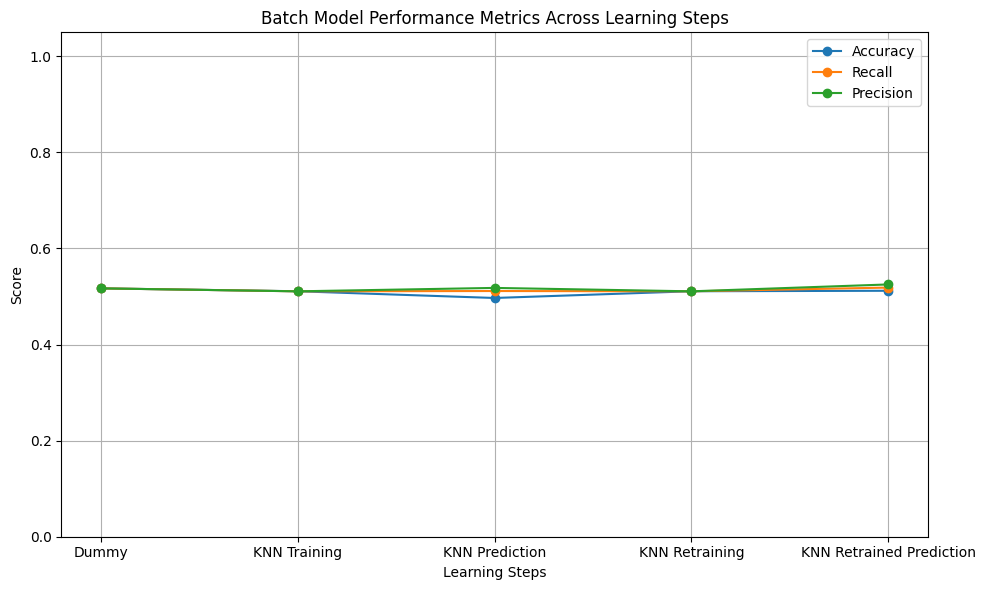

In [40]:
plt.figure(figsize=(10, 6))

plt.plot(steps, accuracy, marker='o', label='Accuracy')
plt.plot(steps, recall, marker='o', label='Recall')
plt.plot(steps, precision, marker='o', label='Precision')

plt.title("Batch Model Performance Metrics Across Learning Steps")
plt.xlabel("Learning Steps")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
